# Compute performance metrics for the given Y and Y_score without sklearn

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# other than these two you should not import any other packages


<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [11]:
# write your code here
numa_orig = pd.read_csv('5_a.csv')
numa_orig = numa_orig.sort_values(by=['proba'],ascending=False)


In [12]:
# transform the DataFrame into classes based on n
def transformNa(n):
    fivea = numa_orig.copy()
    fivea['proba'] = fivea['proba'].apply(lambda x : 0.0 if x<n else 1.0)
    return fivea

In [13]:
#Compute Confusion matrix
def computeConfusion(fivea):
    all_corr,tn,fn,fp,tp =0,0,0,0,0
    all_corr = sum(fivea['y']==fivea['proba'])
    tn =sum((fivea['y']==0.0) & (fivea['proba']==0.0))
    fn =sum((fivea['y']==1.0) & (fivea['proba']==0.0))
    fp =sum((fivea['y']==0.0) & (fivea['proba']==1.0))
    tp =sum((fivea['y']==1.0) & (fivea['proba']==1.0))
    return all_corr,tn,fn,fp,tp

#finding tpr and tnr
def trueFalseRates(tn,fn,fp,tp):
    tpr,tnr,fpr,fnr=0.0,0.0,0.0,0.0
    p=fn+tp
    n=tn+fp
    tpr = tp/p
    tnr = tn/n
    fpr = fp/n
    fnr = fn/p
    return tpr,fpr

#Compute F1 score aling with precision and recal;    
def computeF1(tn,fn,fp,tp):
    precison,recall,f1=0.0,0.0,0.0
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2*(precision*recall)/(precision+recall)    
    return f1

# compute tpr nnd fpr for each threshold value to compute Area under the curve
def computeAUC(df):
    tpr_array,fpr_array= [],[]
    for x in df['proba']:
        data_auc= transformNa(x)      
        all_corr,tn,fn,fp,tp = computeConfusion(data_auc)
        tpr,fpr = trueFalseRates(tn,fn,fp,tp)        
        tpr_array.append(tpr)
        fpr_array.append(fpr)
    return np.array(tpr_array),np.array(fpr_array)
        
        
        
    
    

In [14]:
fivea = transformNa(0.5)
all_corr,tn,fn,fp,tp = computeConfusion(fivea)
print("F1-score -->",computeF1(tn,fn,fp,tp))
print("Accuracy -->",(tp+tn)/(tp+tn+fp+fn))

tpr,fpr = computeAUC(numa_orig)

F1-score --> 0.9950248756218906
Accuracy --> 0.9900990099009901


Confusion matrix:

       actual
---------------------
pred |  0 |  0
     | 100|10000

AUC score ---> 0.48829900000000004


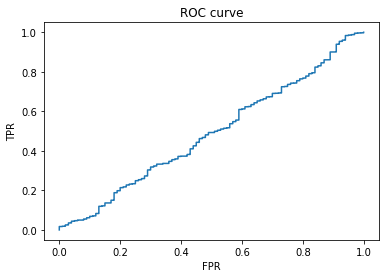

In [15]:
print("Confusion matrix:\n")
print("       actual")
print("---------------------")
print("pred","|  "+str(tn)+" |  "+str(fn))
print("    ","| "+str(fp)+"|"+str(tp))
print()
print("AUC score --->",np.trapz(tpr,fpr))
plt.plot(fpr,tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC curve')
plt.show()

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [16]:
# write your code

numa_orig = pd.read_csv('5_b.csv')
numa_orig = numa_orig.sort_values(by=['proba'],ascending=False)



In [17]:
fivea = transformNa(0.5)
all_corr,tn,fn,fp,tp = computeConfusion(fivea)


print("F1-score -->",computeF1(tn,fn,fp,tp))
print("Accuracy -->",(tp+tn)/(tp+tn+fp+fn))

tpr,fpr = computeAUC(numa_orig)

F1-score --> 0.2791878172588833
Accuracy --> 0.9718811881188119


Confusion matrix:

       actual
---------------------
pred |  9761 |  45
     |  239  | 55

AUC score ---> 0.9377570000000001


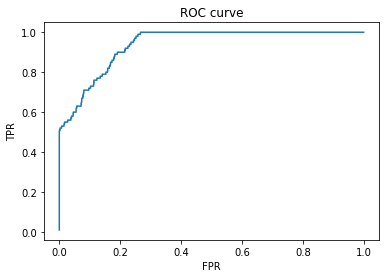

In [28]:
print("Confusion matrix:\n")
print("       actual")
print("---------------------")
print("pred","|  "+str(tn)+" |  "+str(fn))
print("    ","|  "+str(fp)+"  | "+str(tp))
print()
print("AUC score --->",np.trapz(tpr,fpr))
plt.plot(fpr,tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC curve')
plt.show()

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [29]:
# write your code here
numa_orig = pd.read_csv('5_c.csv')
numa_orig = numa_orig.rename(columns = {'prob': 'proba'})#rename to reuse the code
numa_orig = numa_orig.sort_values(by=['proba'])

numa_orig.head()

,y,proba
473,0,0.028038
412,0,0.028396
454,0,0.028964
435,0,0.030269
468,0,0.031114


In [30]:
def transformNa(n):
    fivea = numa_orig.copy()
    fivea['proba'] = fivea['proba'].apply(lambda x : 0.0 if x<n else 1.0)
    return fivea

In [31]:
 # write your code
    
def computeAUC5c(df):
    minA = {}
    for x in df['proba']:
        data_auc= transformNa(x)
      
        all_corr,tn,fn,fp,tp = computeConfusion(data_auc)
        minA[x]=(500*fn)+(100*fp)# Add values to a dictionary
        
    #return tpr,fpr
    return minA

In [32]:
minA = computeAUC5c(numa_orig)

In [33]:
#https://thispointer.com/python-how-to-sort-a-dictionary-by-key-or-value/#
minArray = sorted(minA.items() ,  key=lambda x: x[1])# sort the dictionary into tuples and elicit the first tuple
print("The best threshold value -->",minArray[0][0],"with min A :",minArray[0][1])


The best threshold value --> 0.2300390278970873 with min A : 141000


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [34]:
numa_orig = pd.read_csv('5_d.csv')

In [35]:
numa_orig.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [36]:
numa_orig_new = numa_orig.copy()

In [37]:
numa_orig_new['error'] = abs(numa_orig_new['y']-numa_orig_new['pred'])

In [38]:
numa_orig_new.head()

,y,pred,error
0,101.0,100.0,1.0
1,120.0,100.0,20.0
2,131.0,113.0,18.0
3,164.0,125.0,39.0
4,154.0,152.0,2.0


In [39]:
MAPE=0
MAPE = sum(numa_orig_new['error'])/sum(numa_orig_new['y'])# using the modified version of MAPE to overcome Divsion by zero

In [40]:
print("MAPE ---->",MAPE*100)

MAPE ----> 12.91202994009687


In [41]:
MSE = sum(numa_orig_new['error']**2)/numa_orig_new.count()[0]

In [42]:
print("Mean squared Error --->",MSE)

Mean squared Error ---> 177.16569974554707


In [43]:
mean_pred = numa_orig_new['pred'].mean()
SSt = sum(abs(numa_orig_new['y']-mean_pred)**2)
SSr = sum(numa_orig_new['error']**2)
Rsquared = 1 - (SSr/SSt)

print("R Squared -->",Rsquared)

R Squared --> 0.9563583447288628
